# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [22]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

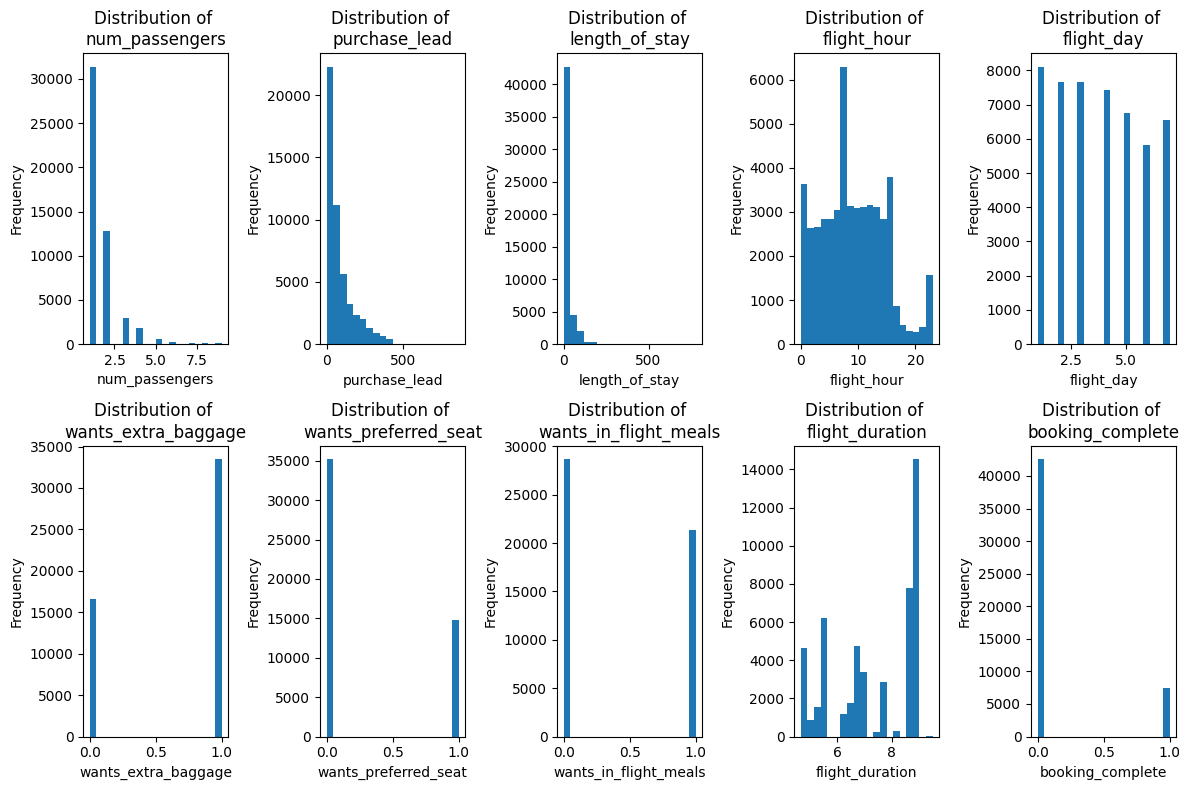

In [30]:
# Get only the numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns for the subplots
num_plots = len(numerical_columns)
num_rows = 2
num_cols = math.ceil(num_plots / num_rows)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if the number of plots is less than the number of subplots
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of \n{column}')

# Remove any extra subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


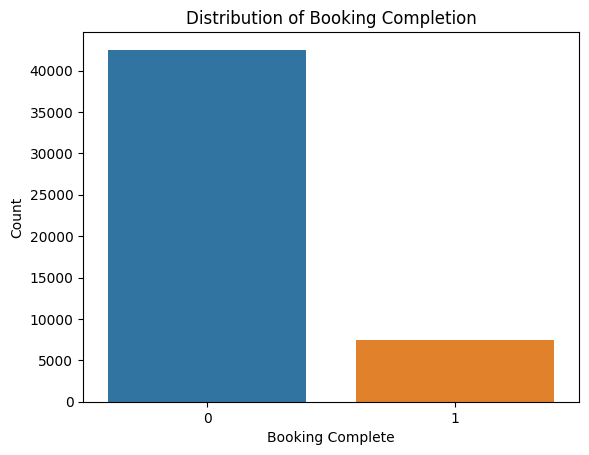

In [24]:
sns.countplot(data=df, x='booking_complete')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion')
plt.show()

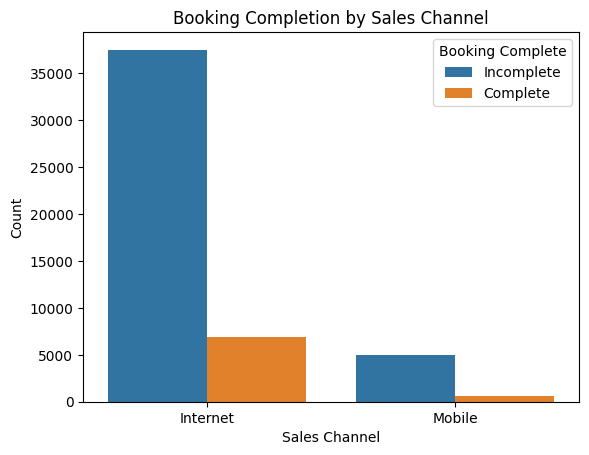

In [23]:
# Example for 'sales_channel' and 'booking_complete'
sns.countplot(data=df, x='sales_channel', hue='booking_complete')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Booking Completion by Sales Channel')
plt.legend(title='Booking Complete', labels=['Incomplete', 'Complete'])
plt.show()


<ipython-input-25-06733e664bfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


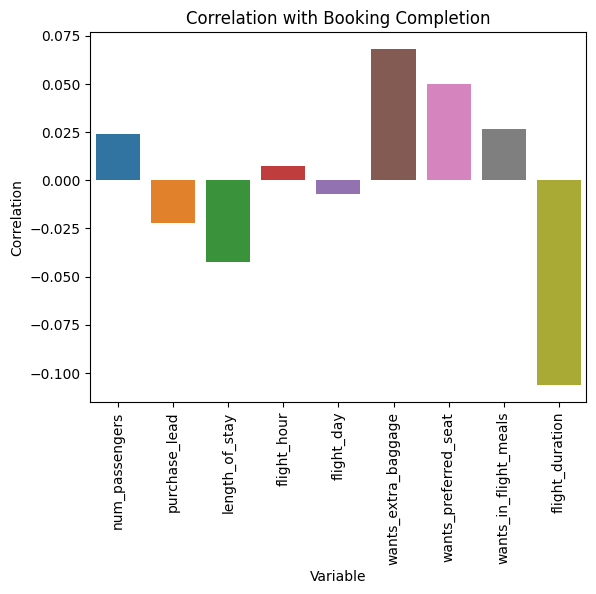

In [25]:
# Correlation between 'booking_complete' and other numerical variables
corr_matrix = df.corr()
booking_complete_corr = corr_matrix['booking_complete'].drop('booking_complete')
sns.barplot(x=booking_complete_corr.index, y=booking_complete_corr.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title('Correlation with Booking Completion')
plt.show()

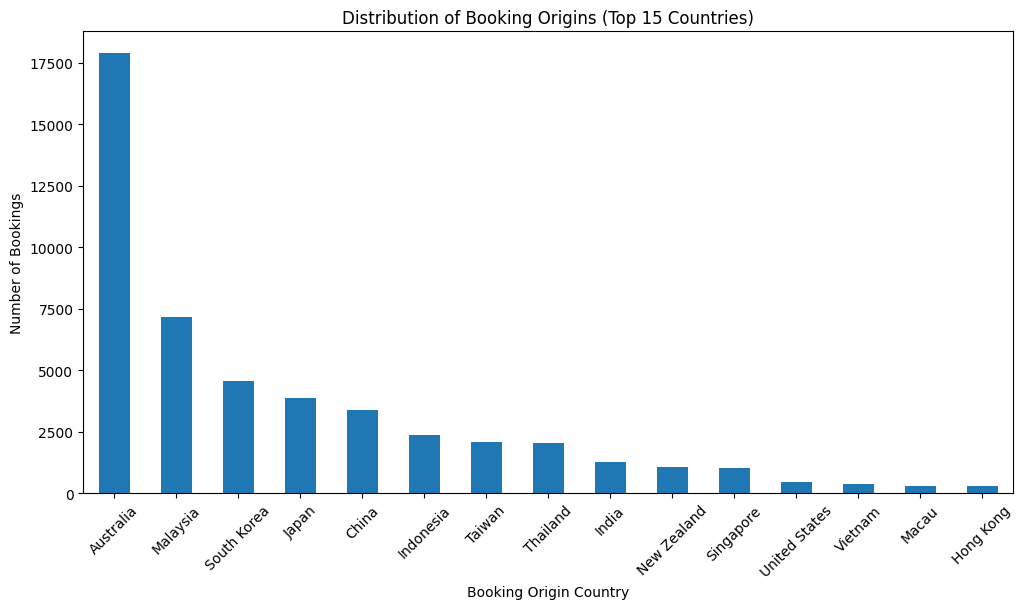

In [32]:
# Group the data by booking origin country and count the number of bookings
booking_origin_counts = df['booking_origin'].value_counts()

# Select the top 15 countries
top_15_countries = booking_origin_counts.head(15)

# Plot the bar plot
plt.figure(figsize=(12, 6))
top_15_countries.plot(kind='bar')
plt.xlabel('Booking Origin Country')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Booking Origins (Top 15 Countries)')
plt.xticks(rotation=45)
plt.show()


In [33]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


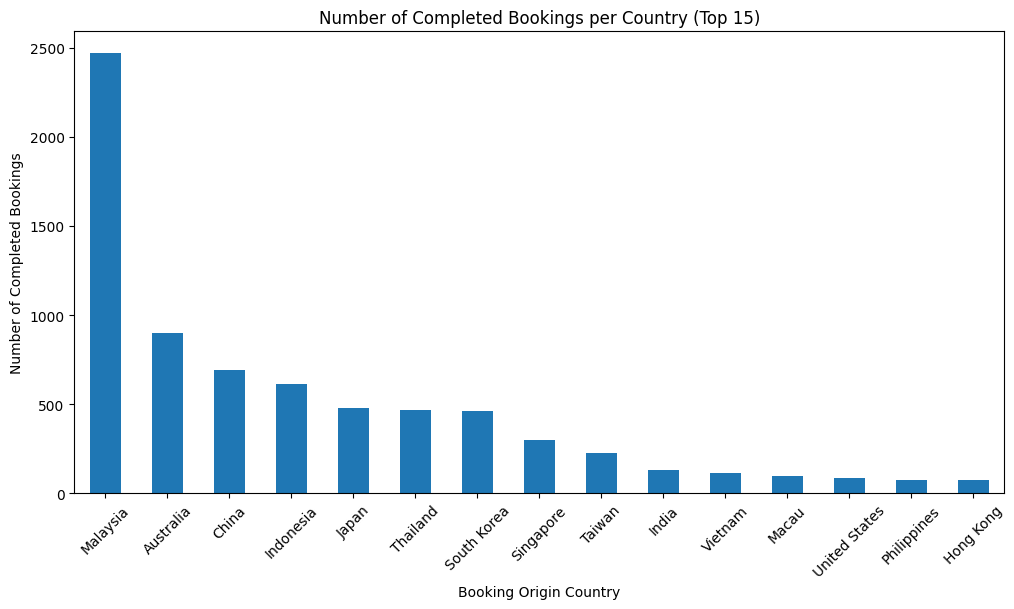

In [35]:
# Group the data by booking origin country and calculate the count of completed bookings
completed_bookings = df[df['booking_complete'] == 1]
booking_origin_completed_counts = completed_bookings['booking_origin'].value_counts()

# Select the top 15 countries
top_15_countries = booking_origin_completed_counts.head(15)

# Plot the bar plot
plt.figure(figsize=(12, 6))
top_15_countries.plot(kind='bar')
plt.xlabel('Booking Origin Country')
plt.ylabel('Number of Completed Bookings')
plt.title('Number of Completed Bookings per Country (Top 15)')
plt.xticks(rotation=45)
plt.show()

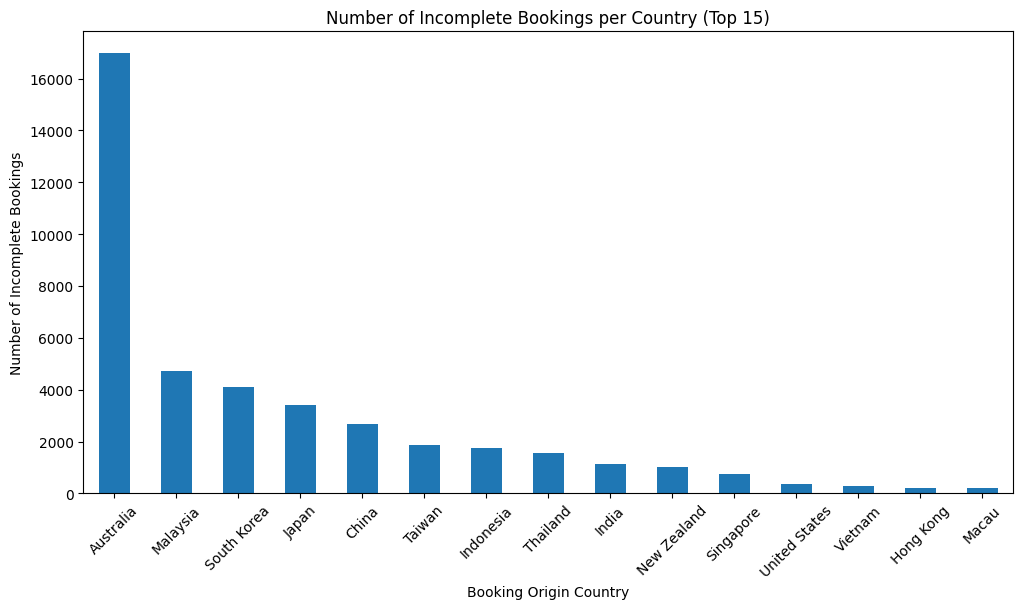

In [36]:
# Group the data by booking origin country and calculate the count of incomplete bookings
incomplete_bookings = df[df['booking_complete'] == 0]
booking_origin_incomplete_counts = incomplete_bookings['booking_origin'].value_counts()

# Select the top 15 countries
top_15_countries = booking_origin_incomplete_counts.head(15)

# Plot the bar plot
plt.figure(figsize=(12, 6))
top_15_countries.plot(kind='bar')
plt.xlabel('Booking Origin Country')
plt.ylabel('Number of Incomplete Bookings')
plt.title('Number of Incomplete Bookings per Country (Top 15)')
plt.xticks(rotation=45)
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assume your data is stored in a DataFrame called 'df'

# Select the relevant features for customer segmentation
selected_features = ['purchase_lead', 'length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

# Extract the selected features from the DataFrame
X = df[selected_features]

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters (k)
k = 3

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to the scaled data and obtain cluster labels
cluster_labels = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [79]:
# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Analyze cluster characteristics by calculating mean values of each feature within each cluster
cluster_means = df.groupby('Cluster').mean()

<ipython-input-79-9a4341415c43>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


In [80]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Cluster
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1


In [81]:
cluster_means = df.groupby('Cluster').mean()
cluster_means

<ipython-input-81-71355f9e8ada>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
Cluster,,,,,,,,,,
0,1.423327,88.326608,13.648985,9.136553,3.814762,0.000000,0.100039,0.221492,7.127450,0.112210
1,1.662227,82.937210,27.737022,8.960657,3.804924,0.997702,0.000000,0.377538,7.211239,0.155920
2,1.671324,84.241454,26.371648,9.154609,3.829239,0.913756,1.000000,0.743971,7.557075,0.182481


In [82]:
cluster_means.sort_values(by = "booking_complete")

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
Cluster,,,,,,,,,,
0,1.423327,88.326608,13.648985,9.136553,3.814762,0.000000,0.100039,0.221492,7.127450,0.112210
1,1.662227,82.937210,27.737022,8.960657,3.804924,0.997702,0.000000,0.377538,7.211239,0.155920
2,1.671324,84.241454,26.371648,9.154609,3.829239,0.913756,1.000000,0.743971,7.557075,0.182481


In [83]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Cluster
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1


In [84]:
# Remove irrelevant columns (e.g., Cluster column)
df = df.drop(['Cluster'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df.drop(['booking_complete'], axis=1)  # Features
y = df['booking_complete']  # Target variable

In [85]:
# Select categorical columns for one-hot encoding
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']

# Perform one-hot encoding for categorical variables
encoded_X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [86]:
encoded_X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2)

# Model Selection - Random Forest Classifier
model = RandomForestClassifier()

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8464
Precision: 0.4832904884318766
Recall: 0.12344057780695995
F1-score: 0.19665271966527198


In [89]:
importance_scores = model.feature_importances_
feature_names = encoded_X.columns

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 15 important features
top_15_features = feature_importances.head(15)

# Display the top 15 important features
print(top_15_features)


                      Feature  Importance
1               purchase_lead    0.157303
3                 flight_hour    0.127778
2              length_of_stay    0.115245
4                  flight_day    0.090126
0              num_passengers    0.047568
8             flight_duration    0.034531
860   booking_origin_Malaysia    0.031488
7       wants_in_flight_meals    0.022159
813  booking_origin_Australia    0.018695
5         wants_extra_baggage    0.017768
6        wants_preferred_seat    0.017619
9        sales_channel_Mobile    0.011140
728              route_PENTPE    0.007405
846  booking_origin_Indonesia    0.005265
17               route_AKLKUL    0.004520


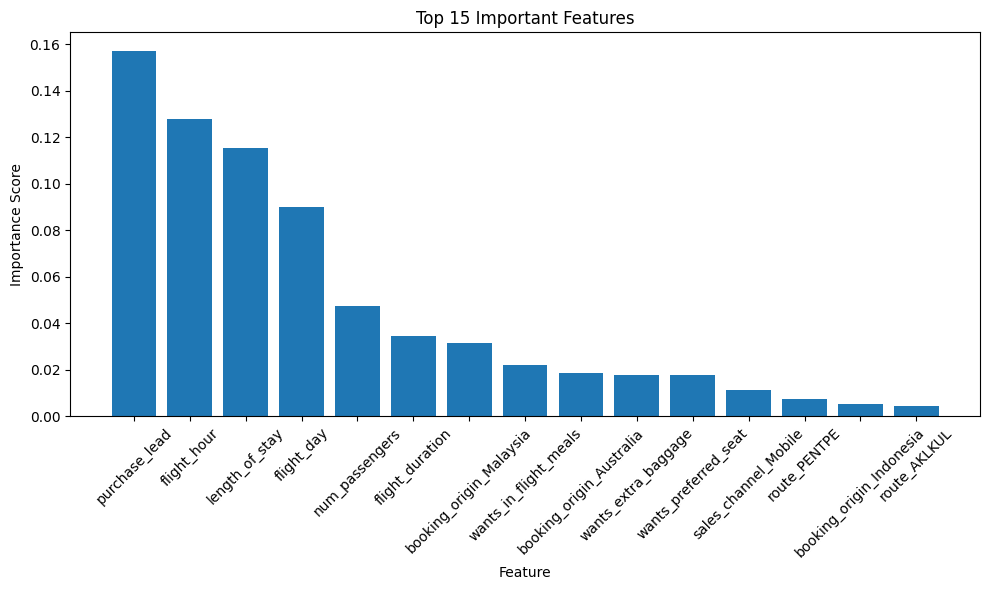

In [91]:
# Plot the top 15 important features
plt.figure(figsize=(10, 6))
plt.bar(top_15_features['Feature'], top_15_features['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

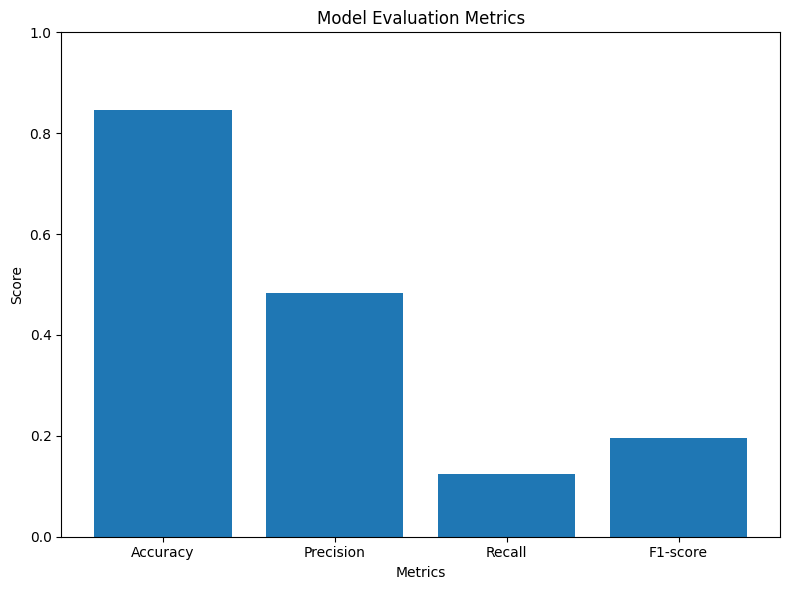

In [93]:
# Define the evaluation metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.8464, 0.4833, 0.1234, 0.1967]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.tight_layout()
plt.show()
